## **Class Imbalance**

In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

#### **Label Class Imbalance**

In [6]:
from src.imbalance.class_imbalance import *

1. **Baseline Dataset**

In [27]:
base_df = pd.read_csv('../datasets/data_merged.csv', index_col='date')
base_df.head()

,label,GDP_diff,UNRATE,CPI_diff,INDPRO_diff,DFF_diff,DGS10_diff,DGS2_diff,T10Y2Y,VIX,DTB3_diff,NEWS_SENTIMENT
date,,,,,,,,,,,,
1990-01-01,1,125.464,5.300000,2.166667,0.458233,-0.366457,0.516774,0.513065,0.059032,22.174603,0.112097,0.051820
1990-04-01,1,87.327,5.333333,1.266667,0.427133,-0.008659,0.250256,0.206272,0.103016,18.722063,-0.016882,0.011166
1990-07-01,1,55.088,5.700000,2.233333,0.242767,-0.079123,0.027143,-0.472381,0.602540,25.195556,-0.269524,-0.136543
1990-10-01,1,-10.383,6.133333,2.233333,-0.973267,-0.416848,-0.295302,-0.492601,0.800161,26.113281,-0.482304,-0.225727
1991-01-01,1,30.445,6.600000,1.000000,-1.184833,-1.312925,-0.383134,-0.570129,0.987167,22.515833,-0.966172,-0.263631


In [28]:
compute_imbalance_measures(base_df, 'label')

Class counts:
label
0    125
1     17
Name: count, dtype: int64

Imbalance Ratio (IR): 7.353
Normalized Imbalance Measure (C2): 0.864


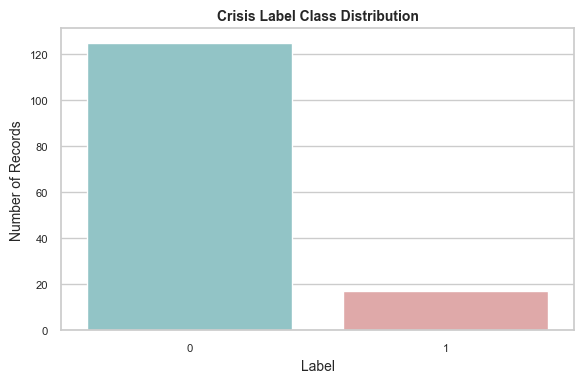

In [29]:
plot_target_distribution(base_df, 'label')

2. **Imputed Dataset**

In [10]:
imputed_df = pd.read_csv('../datasets/data_imputed.csv', index_col='date')
imputed_df.head()

,label,GDP,GDP_diff,UNRATE,CPI,CPI_diff,INDPRO,INDPRO_diff,DFF,DFF_diff,...,DFF_diff_missing,DGS10_missing,DGS10_diff_missing,DGS2_missing,DGS2_diff_missing,T10Y2Y_missing,VIX_missing,DTB3_missing,DTB3_diff_missing,NEWS_SENTIMENT_missing
date,,,,,,,,,,,,,,,,,,,,,
1967-10-01,0,881.439,16.206,3.900000,33.866667,0.366667,35.926333,0.936267,4.172826,0.280978,...,0,0,0,1,1,1,1,0,0,1
1968-01-01,0,909.387,27.948,3.733333,34.200000,0.333333,36.439167,0.512833,4.792637,0.619811,...,0,0,0,1,1,1,1,0,0,1
1968-04-01,0,934.344,24.957,3.566667,34.533333,0.333333,36.930433,0.491267,5.984286,1.191648,...,0,0,0,1,1,1,1,0,0,1
1968-07-01,0,950.825,16.481,3.533333,35.000000,0.466667,37.216967,0.286533,5.946522,-0.037764,...,0,0,0,1,1,1,1,0,0,1
1968-10-01,0,968.030,17.205,3.400000,35.433333,0.433333,37.782167,0.565200,5.918152,-0.028370,...,0,0,0,1,1,1,1,0,0,1


Class counts:
label
0    190
1     41
Name: count, dtype: int64

Imbalance Ratio (IR): 4.634
Normalized Imbalance Measure (C2): 0.784


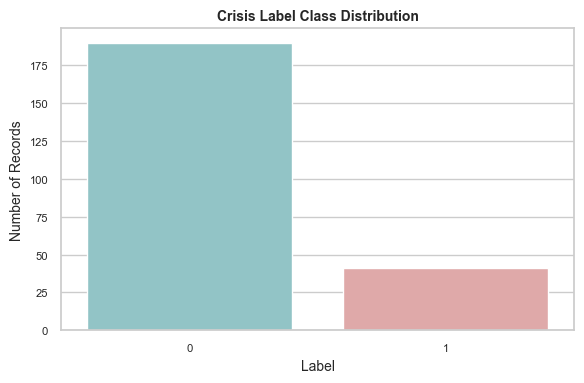

In [13]:
compute_imbalance_measures(imputed_df, 'label')
plot_target_distribution(imputed_df, 'label')

#### **Baseline Results**

In [7]:
from src.models.run_lstm_experiments import main

1. **Baseline Dataset**

In [8]:
baseline_lstm_config_path = '../src/models/configs/lstm_config.json'
history_baseline = main(baseline_lstm_config_path)

Using device:  /CPU:0
Scaler saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/scaler_base.save
Train split size: 113
Test split size: 29


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Model saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/lstm_base_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Confusion Matrix:
[[ 3 20]
 [ 0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.13      0.23        23
           1       0.09      1.00      0.17         2

    accuracy                           0.20        25
   macro avg       0.55      0.57      0.20        25
weighted avg       0.93      0.20      0.23        25

Results in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/results_base.json


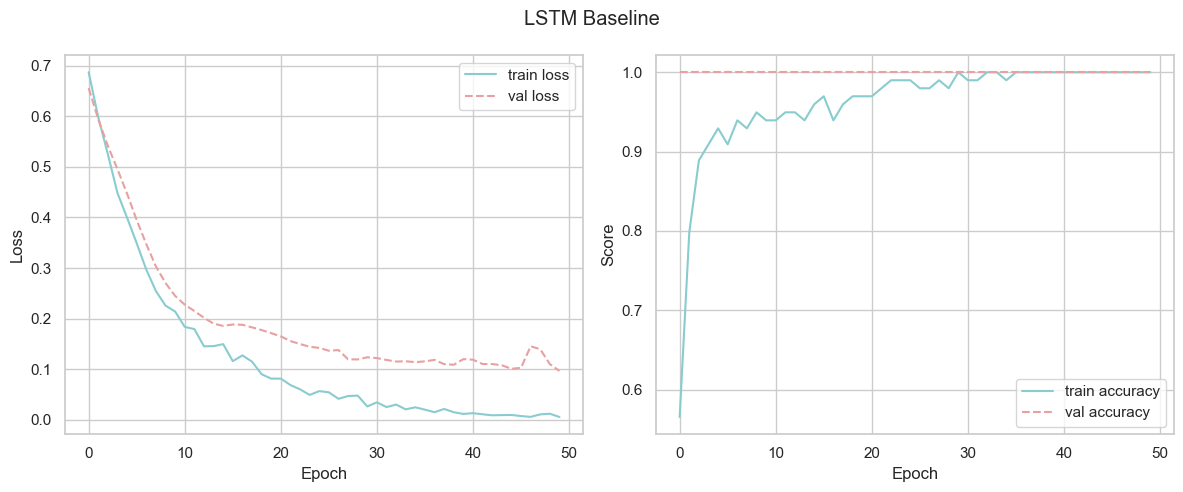

In [32]:
plot_training_history(history_baseline, 'LSTM Baseline')

2. **Imputed Dataset**

In [48]:
baseline_lstm_imputed_config_path = '../src/models/configs/lstm_imputed_config.json'
history_baseline_imputed = main(baseline_lstm_imputed_config_path)

Using device:  /CPU:0
Scaler saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/scaler_base_imputed.save
Train split size: 184
Test split size: 47


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 64)             │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,969 (109.25 KB)

 Trainable params: 27,969 (109.25 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Model saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/lstm_base_model_imputed.h5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Confusion Matrix:
[[18 23]
 [ 0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        41
           1       0.08      1.00      0.15         2

    accuracy                           0.47        43
   macro avg       0.54      0.72      0.38        43
weighted avg       0.96      0.47      0.59        43

Results in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/results_base_imputed.json


In [4]:
print(agg_path)

outputs/base_aggregated.json


In [5]:
plot_training_history(history_baseline_imputed, 'LSTM Imputed Baseline')

NameError: name 'plot_training_history' is not defined

## **Mitigate Imbalance**

In [15]:
from src.models.train_utils import split_data, scale_data
from src.models.run_lstm_experiments import main

#### **Data-Level technique:** Window-based Event Oversampling

1. **Baseline Dataset**

In [34]:
train_df, test_df = split_data(base_df, train_size=0.8)
train_df.head()

,label,GDP_diff,UNRATE,CPI_diff,INDPRO_diff,DFF_diff,DGS10_diff,DGS2_diff,T10Y2Y,VIX,DTB3_diff,NEWS_SENTIMENT
date,,,,,,,,,,,,
1990-01-01,1,125.464,5.300000,2.166667,0.458233,-0.366457,0.516774,0.513065,0.059032,22.174603,0.112097,0.051820
1990-04-01,1,87.327,5.333333,1.266667,0.427133,-0.008659,0.250256,0.206272,0.103016,18.722063,-0.016882,0.011166
1990-07-01,1,55.088,5.700000,2.233333,0.242767,-0.079123,0.027143,-0.472381,0.602540,25.195556,-0.269524,-0.136543
1990-10-01,1,-10.383,6.133333,2.233333,-0.973267,-0.416848,-0.295302,-0.492601,0.800161,26.113281,-0.482304,-0.225727
1991-01-01,1,30.445,6.600000,1.000000,-1.184833,-1.312925,-0.383134,-0.570129,0.987167,22.515833,-0.966172,-0.263631


In [35]:
test_df.head()

,label,GDP_diff,UNRATE,CPI_diff,INDPRO_diff,DFF_diff,DGS10_diff,DGS2_diff,T10Y2Y,VIX,DTB3_diff,NEWS_SENTIMENT
date,,,,,,,,,,,,
2018-04-01,0,252.359,3.933333,1.357333,1.185200,0.289923,0.162100,0.316539,0.443594,15.337500,0.281609,-0.001222
2018-07-01,0,217.818,3.766667,1.007333,0.854800,0.189273,0.003185,0.188842,0.257937,12.856825,0.195565,-0.047521
2018-10-01,0,119.137,3.833333,1.024667,0.216533,0.293913,0.117338,0.136914,0.238361,21.053651,0.274629,0.036399
2019-01-01,0,193.733,3.866667,0.674667,-1.010800,0.181669,-0.388197,-0.317705,0.167869,16.470000,0.077541,0.003890
2019-04-01,0,286.338,3.633333,1.861667,-0.670467,-0.004415,-0.314062,-0.357145,0.210952,15.183016,-0.083440,0.005775


In [36]:
train_df, test_df, scaler = scale_data(train_df, test_df, scaler_path='../outputs/scaler_oversampling.save', target_col='label')

Scaler saved in ../outputs/scaler_oversampling.save


In [37]:
n_steps = 4
target_column = 'label'
feature_cols = [c for c in train_df.columns if c != target_column]

In [38]:
X_windows, y_windows = create_windows_for_oversampling(train_df, n_steps=n_steps, target_column=target_column)
print("Before oversampling:", np.unique(y_windows, return_counts=True))

Before oversampling: (array([0., 1.]), array([89, 21]))


In [39]:
X_balanced, y_balanced = oversample_windows(X_windows, y_windows)
print("After Oversampling:", np.unique(y_balanced, return_counts=True))

After Oversampling: (array([0., 1.]), array([89, 89]))


In [ ]:
oversampled_train_df = windows_to_dataframe(X_balanced, y_balanced, feature_cols=feature_cols, n_steps=n_steps, target_column=target_column)
oversampled_train_df.head()

,GDP_diff_t0,UNRATE_t0,CPI_diff_t0,INDPRO_diff_t0,DFF_diff_t0,DGS10_diff_t0,DGS2_diff_t0,T10Y2Y_t0,VIX_t0,DTB3_diff_t0,...,CPI_diff_t3,INDPRO_diff_t3,DFF_diff_t3,DGS10_diff_t3,DGS2_diff_t3,T10Y2Y_t3,VIX_t3,DTB3_diff_t3,NEWS_SENTIMENT_t3,label
0,-0.430498,0.556789,-0.300440,-0.030730,-1.196361,0.405166,-0.208756,0.009734,-0.306057,-1.065783,...,-0.163498,-0.404562,-1.738260,0.020499,-0.363550,0.910956,-0.248153,-1.533324,0.003129,0.0
1,-0.575814,0.578321,-0.060791,0.453097,-0.369695,-0.355157,-0.735437,0.237444,-0.377223,-0.326654,...,-0.026555,0.692219,-0.444318,0.313471,-0.091942,1.095191,-0.518477,-0.424613,-0.160126,0.0
2,-0.811749,0.729046,0.041916,-0.206752,-1.815678,-1.529473,-2.204506,0.712907,-0.263276,-1.996684,...,-0.026555,0.135424,-1.073736,-1.945803,-2.284316,1.435444,-0.756381,-1.394678,-0.357069,0.0
3,-0.351231,0.901304,-0.163498,-0.404562,-1.738260,0.020499,-0.363550,0.910956,-0.248153,-1.533324,...,0.144623,0.265578,-0.382776,0.456939,0.784811,1.236761,-0.637165,0.104107,0.062825,0.0
4,-0.246367,1.052029,-0.026555,0.692219,-0.444318,0.313471,-0.091942,1.095191,-0.518477,-0.424613,...,-0.060791,0.212255,0.168580,-1.193541,-0.595450,1.040108,-0.846128,-0.144644,1.006880,0.0


In [41]:
compute_imbalance_measures(oversampled_train_df, 'label')

Class counts:
label
0.0    89
1.0    89
Name: count, dtype: int64

Imbalance Ratio (IR): 1.000
Normalized Imbalance Measure (C2): 0.000


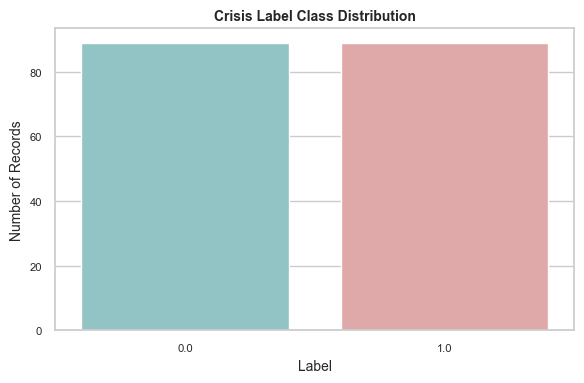

In [42]:
plot_target_distribution(oversampled_train_df, 'label')

In [43]:
# save oversampled_train_df, test_df in datasets/oversampling
oversampled_train_df.to_csv('../datasets/oversampling/oversampled_train_df.csv')
test_df.to_csv('../datasets/oversampling/test_df.csv')

In [ ]:
oversampling_lstm_config_path = '../src/models/configs/oversampling_lstm_config.json' # config path to train with the oversampled dataset
history_oversampling = main(oversampling_lstm_config_path)

Using device:  /CPU:0
Training with Oversampled data
True
4 11


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Model saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/lstm_oversampling_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Confusion Matrix:
[[14  9]
 [ 0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        23
           1       0.18      1.00      0.31         2

    accuracy                           0.64        25
   macro avg       0.59      0.80      0.53        25
weighted avg       0.93      0.64      0.72        25

Results in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/results_oversampling.json


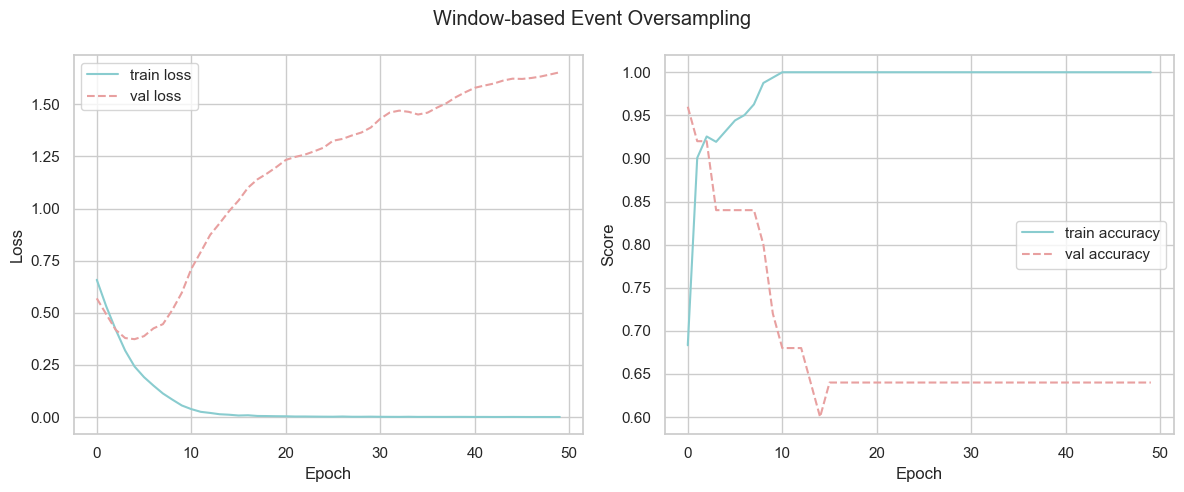

In [52]:
plot_training_history(history_oversampling, 'Window-based Event Oversampling')

2. **Imputed Dataset**

In [35]:
train_df, test_df = split_data(imputed_df, train_size=0.8)
train_df.head()
test_df.head()
train_df, test_df, scaler = scale_data(train_df, test_df, scaler_path='../outputs/scaler_oversampling_imputed.save', target_col='label')

Scaler saved in ../outputs/scaler_oversampling_imputed.save


In [36]:
n_steps = 4
target_column = 'label'
feature_cols = [c for c in train_df.columns if c != target_column]

In [37]:
X_windows, y_windows = create_windows_for_oversampling(train_df, n_steps=n_steps, target_column=target_column)
print("Before oversampling:", np.unique(y_windows, return_counts=True))

Before oversampling: (array([0., 1.]), array([121,  60]))


In [38]:
X_balanced, y_balanced = oversample_windows(X_windows, y_windows)
print("After Oversampling:", np.unique(y_balanced, return_counts=True))

After Oversampling: (array([0., 1.]), array([121, 121]))


In [39]:
oversampled_imputed_train_df = windows_to_dataframe(X_balanced, y_balanced, feature_cols=feature_cols, n_steps=n_steps, target_column=target_column)
oversampled_imputed_train_df.head()

,GDP_t0,GDP_diff_t0,UNRATE_t0,CPI_t0,CPI_diff_t0,INDPRO_t0,INDPRO_diff_t0,DFF_t0,DFF_diff_t0,DGS10_t0,...,DGS10_missing_t3,DGS10_diff_missing_t3,DGS2_missing_t3,DGS2_diff_missing_t3,T10Y2Y_missing_t3,VIX_missing_t3,DTB3_missing_t3,DTB3_diff_missing_t3,NEWS_SENTIMENT_missing_t3,label
0,-1.248740,-1.011675,-1.443833,-1.555909,-0.869719,-1.471213,0.585258,-0.441439,0.302743,-0.440240,...,0.0,0.0,2.10042,2.063284,2.10042,1.033158,0.0,0.0,1.65985,0.0
1,-1.243042,-0.844909,-1.545565,-1.550456,-0.910028,-1.447133,0.161602,-0.273990,0.642785,-0.451424,...,0.0,0.0,2.10042,2.063284,2.10042,1.033158,0.0,0.0,1.65985,0.0
2,-1.237954,-0.887389,-1.647298,-1.545002,-0.910028,-1.424065,0.140024,0.047947,1.216663,-0.402402,...,0.0,0.0,2.10042,2.063284,2.10042,1.033158,0.0,0.0,1.65985,0.0
3,-1.197012,-0.580742,-0.202692,-1.456659,-0.910028,-1.396662,0.358439,-0.525202,-1.690807,-0.310505,...,0.0,0.0,2.10042,2.063284,2.10042,1.033158,0.0,0.0,1.65985,0.0
4,-1.192707,-0.941955,-0.223038,-1.450660,-0.869719,-1.380707,-0.011522,-0.334880,0.727751,-0.219079,...,0.0,0.0,2.10042,2.063284,2.10042,1.033158,0.0,0.0,1.65985,0.0


Class counts:
label
0.0    121
1.0    121
Name: count, dtype: int64

Imbalance Ratio (IR): 1.000
Normalized Imbalance Measure (C2): 0.000


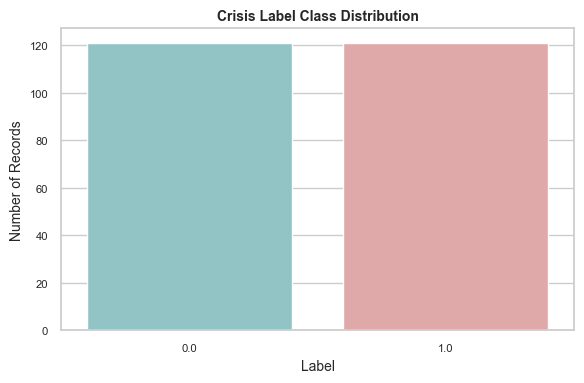

In [40]:
compute_imbalance_measures(oversampled_imputed_train_df, 'label')
plot_target_distribution(oversampled_imputed_train_df, 'label')

In [41]:
# save oversampled_train_df, test_df in datasets/oversampling
oversampled_imputed_train_df.to_csv('../datasets/oversampling/oversampled_imputed_train_df.csv')
test_df.to_csv('../datasets/oversampling/test_imputed_df.csv')

In [46]:
oversampling_imputed_lstm_config_path = '../src/models/configs/oversampling_imputed_lstm_config.json' 
history_oversampling_imputed = main(oversampling_imputed_lstm_config_path)

Using device:  /CPU:0
Training with Oversampled data
True
4 36


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 64)             │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,969 (109.25 KB)

 Trainable params: 27,969 (109.25 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Model saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/lstm_oversampling_imputed_model.h5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Confusion Matrix:
[[25 16]
 [ 0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        41
           1       0.11      1.00      0.20         2

    accuracy                           0.63        43
   macro avg       0.56      0.80      0.48        43
weighted avg       0.96      0.63      0.73        43

Results in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/results_oversampling_imputed.json


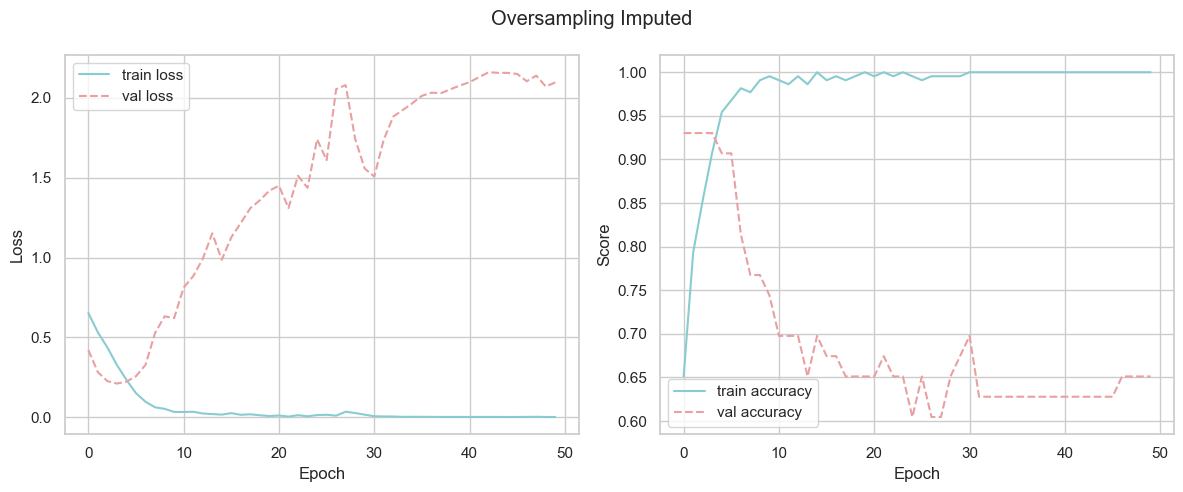

In [44]:
plot_training_history(history_oversampling_imputed, 'Oversampling Imputed')

#### **Algorithmic-Level techniques:**

**Focal Loss**

In [65]:
focal_loss_lstm_config_path = '../src/models/configs/focal_loss_lstm_config.json' # config path to train with the oversampled dataset
history_focal_loss = main(focal_loss_lstm_config_path)

Using device:  /CPU:0
Training with Focal Loss
Scaler saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/scaler_focal_loss.save


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Model saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/lstm_focal_loss_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Confusion Matrix:
[[ 9 14]
 [ 0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        23
           1       0.12      1.00      0.22         2

    accuracy                           0.44        25
   macro avg       0.56      0.70      0.39        25
weighted avg       0.93      0.44      0.54        25

Results in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/results_focal_loss.json


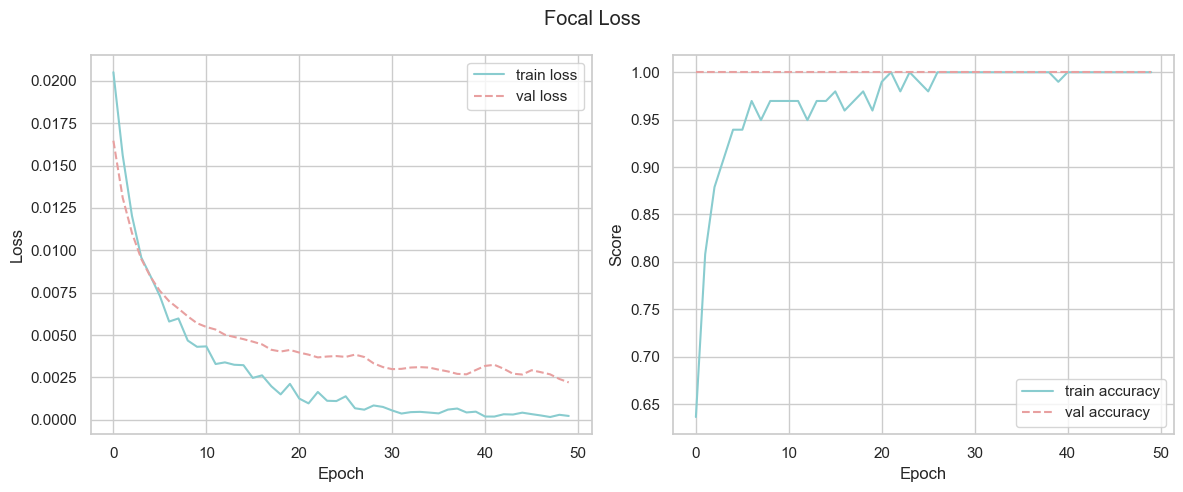

In [66]:
plot_training_history(history_focal_loss, 'Focal Loss')

In [68]:
focal_loss_imputed_lstm_config_path = '../src/models/configs/focal_loss_imputed_lstm_config.json' 
history_focal_loss_imputed = main(focal_loss_imputed_lstm_config_path)

Using device:  /CPU:0
Training with Focal Loss
Scaler saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/scaler_focal_loss_imputed.save


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 64)             │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,969 (109.25 KB)

 Trainable params: 27,969 (109.25 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Model saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/lstm_focal_loss_imputed_model.h5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Confusion Matrix:
[[30 11]
 [ 0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        41
           1       0.15      1.00      0.27         2

    accuracy                           0.74        43
   macro avg       0.58      0.87      0.56        43
weighted avg       0.96      0.74      0.82        43

Results in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/results_focal_loss_imputed.json


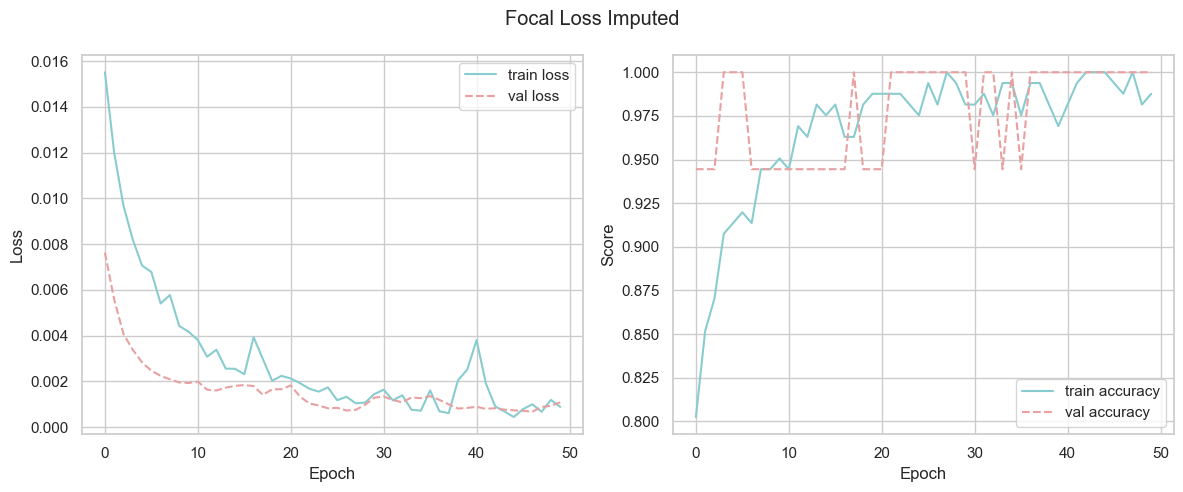

In [69]:
plot_training_history(history_focal_loss_imputed, 'Focal Loss Imputed')

**Class Weights**

In [ ]:
class_weights_lstm_config_path = '../src/models/configs/class_weights_lstm_config.json'
history_class_weights = main(class_weights_lstm_config_path)

Using device:  /CPU:0
Training with Class-Weights
Scaler saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/scaler_class_weights.save


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Model saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/lstm_class_weights_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Confusion Matrix:
[[15  5]
 [ 0  1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.17      1.00      0.29         1

    accuracy                           0.76        21
   macro avg       0.58      0.88      0.57        21
weighted avg       0.96      0.76      0.83        21

Results in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/results_class_weights.json


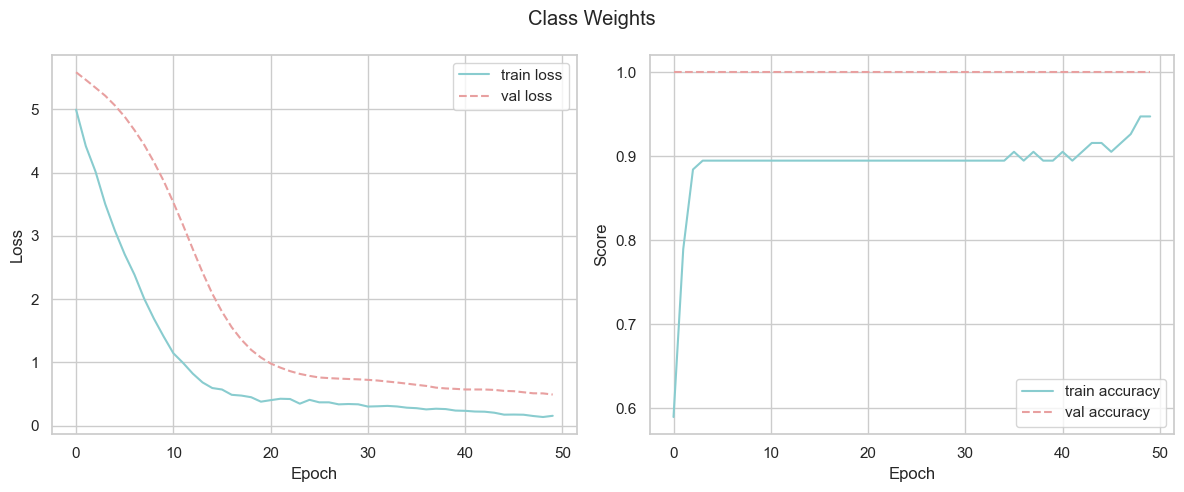

In [58]:
plot_training_history(history_class_weights, 'Class Weights')

In [80]:
class_weights_imputed_lstm_config_path = '../src/models/configs/class_weights_imputed_lstm_config.json'
history_class_weights_imputed = main(class_weights_imputed_lstm_config_path)

Using device:  /CPU:0
Training with Class-Weights
Scaler saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/scaler_class_weights_imputed.save


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 64)             │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,969 (109.25 KB)

 Trainable params: 27,969 (109.25 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Model saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/lstm_class_weights_imputed_model.h5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step 
Confusion Matrix:
[[27 10]
 [ 0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        37
           1       0.17      1.00      0.29         2

    accuracy                           0.74        39
   macro avg       0.58      0.86      0.56        39
weighted avg       0.96      0.74      0.82        39

Results in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/results_class_weights_imputed.json


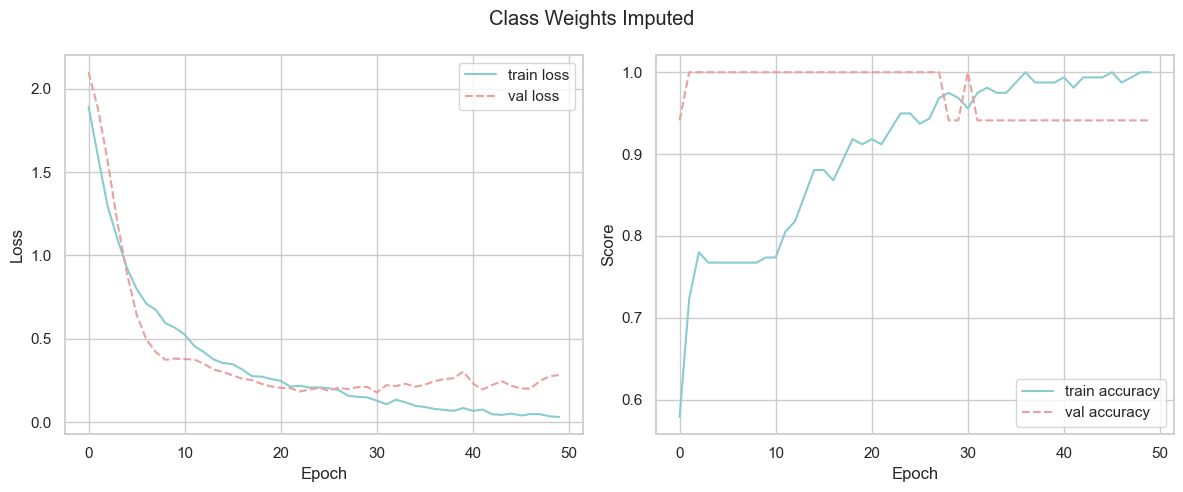

In [81]:
plot_training_history(history_class_weights_imputed, 'Class Weights Imputed')

**Adaptive Cost Sensitive**

In [ ]:
adaptive_cost_sensitive_lstm_config_path = '../src/models/configs/cost_sensitive_lstm_config.json'
history_cost_sensitive = main(adaptive_cost_sensitive_lstm_config_path)

Using device:  /CPU:0
Training with Adaptive Cost-Sensitive Loss
Scaler saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/scaler_cost_sensitive.save
Validation positives: 0
Validation negatives: 10


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,569 (84.25 KB)

 Trainable params: 21,569 (84.25 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Model saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/lstm_cost_sensitive_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Confusion Matrix:
[[14  6]
 [ 0  1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        20
           1       0.14      1.00      0.25         1

    accuracy                           0.71        21
   macro avg       0.57      0.85      0.54        21
weighted avg       0.96      0.71      0.80        21

Results in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/results_cost_sensitive.json


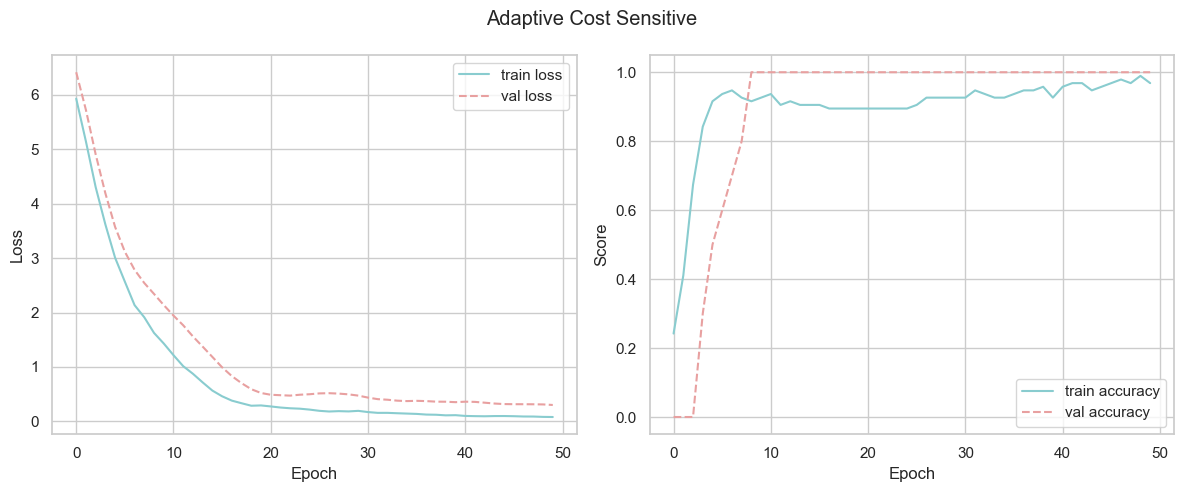

In [63]:
plot_training_history(history_cost_sensitive, title='Adaptive Cost Sensitive')

In [85]:
adaptive_cost_sensitive_imputed_lstm_config_path = '../src/models/configs/cost_sensitive_imputed_lstm_config.json'
history_cost_sensitive_imputed = main(adaptive_cost_sensitive_imputed_lstm_config_path)

Using device:  /CPU:0
Training with Adaptive Cost-Sensitive Loss
Scaler saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/scaler_cost_sensitive_imputed.save
Validation positives: 0
Validation negatives: 17


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                  │ (None, 64)             │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,969 (109.25 KB)

 Trainable params: 27,969 (109.25 KB)

 Non-trainable params: 0 (0.00 B)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Model saved in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/lstm_cost_sensitive_imputed_model.h5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Confusion Matrix:
[[30  7]
 [ 1  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88        37
           1       0.12      0.50      0.20         2

    accuracy                           0.79        39
   macro avg       0.55      0.66      0.54        39
weighted avg       0.92      0.79      0.85        39

Results in /Users/sarataboas/Desktop/master/ai_society/individual_assignment/socialCrisis_prediction/outputs/results_cost_sensitive_imputed.json


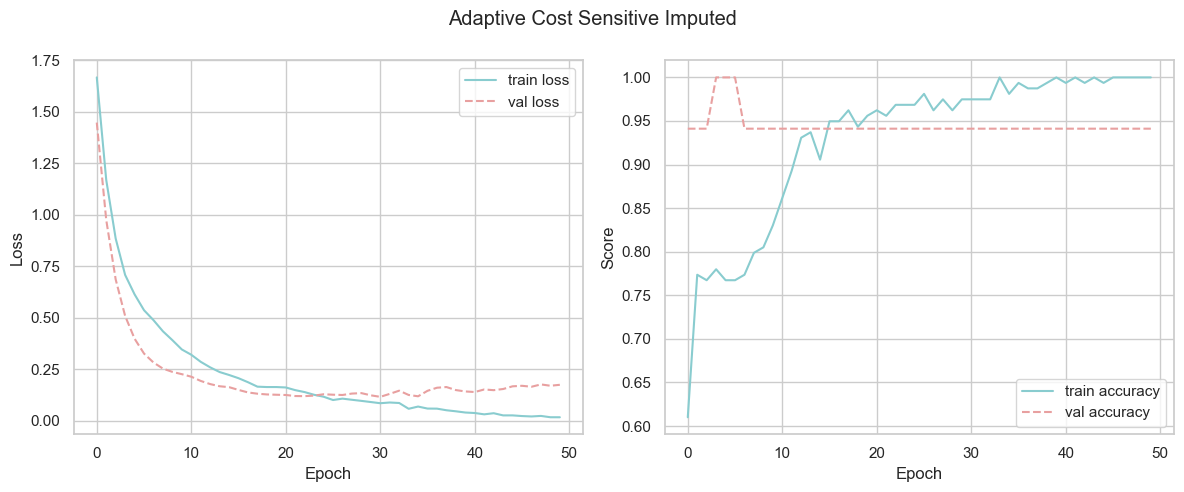

In [86]:
plot_training_history(history_cost_sensitive_imputed, 'Adaptive Cost Sensitive Imputed')